# Fig. 1(g-i): Eigenspectra of the Liouvillian

# FFT for three phases

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
from matplotlib.ticker import AutoMinorLocator
from matplotlib.animation import FuncAnimation
from scipy.integrate import odeint
from scipy.fftpack import fft, fftfreq, fftshift
from scipy.signal import find_peaks
from scipy.integrate import solve_ivp
from functools import partial


plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['mathtext.rm'] = 'serif'
plt.rcParams['font.family'] = 'serif'
def vectorfield_BHm(m, t, p):
    """
    Defines the system of differential equations based on Model B.
   
    Arguments:
        w : vector of the state variables
            w = [mxA, myA, mzA, mxB, myB, mzB]
        t : time
        p : vector of parameters
            p = [OmegaA, OmegaB, Gamma]
    """
   
    xA, pA, xB, pB = m
    Omega,kappa,U = p
   
    f = [ Omega*pB/2-kappa*xA*(xB**2+pB**2)/4+U*pA*(xA**2+pA**2),
         -Omega*xB/2-kappa*pA*(xB**2+pB**2)/4-U*xA*(xA**2+pA**2),
         Omega*pA/2+kappa*xB*(xA**2+pA**2)/4+U*pB*(xB**2+pB**2),
         -Omega*xA/2+kappa*pB*(xA**2+pA**2)/4-U*xB*(xB**2+pB**2)]
   
    return f

def fourier_transform(data, dt):
    n = len(data)
    fft_result = np.fft.fft(data)
    fft_freq = 2*np.pi*np.fft.fftfreq(n, dt)
    return fft_freq, fft_result

Omega1 = 0.8
Omega2 = 1.45
U1=0
U2=0.25
κ=1
xx=0.3
m0 = [np.sqrt(xx), np.sqrt(2-xx), np.sqrt(xx), np.sqrt(2-xx)]

f_s = 10                              # number of time steps
end = 1000                             # final time
time = np.linspace(0.0, end, end*f_s)

p0 = [Omega2,κ,U1]
p1 = [Omega1,κ,U2]
p2 = [Omega2,κ,U2]

# ODE solver parameters
abserr = 1.0e-12
relerr = 1.0e-10
stoptime = 10.0
numpoints = 250

msol0 = odeint(vectorfield_BHm, m0, time, args=(p0,), atol=abserr, rtol=relerr)
msol1 = odeint(vectorfield_BHm, m0, time, args=(p1,), atol=abserr, rtol=relerr)
msol2 = odeint(vectorfield_BHm, m0, time, args=(p2,), atol=abserr, rtol=relerr)


fft_freqA0, fft_resultA0 = fourier_transform(msol0[:,1], 1/f_s)
fft_freqB0, fft_resultB0 = fourier_transform(msol0[:,3], 1/f_s)
fft_freqA1, fft_resultA1 = fourier_transform(msol1[:,1], 1/f_s)
fft_freqB1, fft_resultB1 = fourier_transform(msol1[:,3], 1/f_s)
fft_freqA2, fft_resultA2 = fourier_transform(msol2[:,1-1], 1/f_s)
fft_freqB2, fft_resultB2 = fourier_transform(msol2[:,3-1], 1/f_s)

# Reading data

In [23]:
import time
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import sparse
from scipy.sparse import linalg
import matplotlib.pyplot as plt



N_TC1=np.linspace(20,75,12)
data_TC1=[]
for N in N_TC1:
    data_TC1.append(np.genfromtxt('eigs_N_U00_'+str(int(N))+'.dat', dtype='complex'))
    
N1N2_TC1=np.linspace(20,75,12)

data2_TC1=[]
for N in N1N2_TC1:
    data2_TC1.append(np.genfromtxt('BTC_N1_N2_'+str(int(N))+'.dat', dtype='complex'))

N2_TC2=np.linspace(15,75,13)        

data1_TC2=[]
for N in N2_TC2:
    data1_TC2.append(np.genfromtxt('eigs_TC2_N_'+str(int(N))+'.dat', dtype='complex'))

data2_TC2=[]
for N in N2_TC2:
    data2_TC2.append(np.genfromtxt('eigs_TC2_N1_N2_'+str(int(N))+'.dat', dtype='complex'))
    
N1_TC3=np.linspace(20,75,12)  
data1_TC3=[]
for N in N1_TC3:
    data1_TC3.append(np.genfromtxt('eigs_N_TCnew_'+str(int(N))+'.dat', dtype='complex'))

N2_TC3=np.linspace(20,100,17)
data2_TC3=[]
for N in N2_TC3:
    data2_TC3.append(np.genfromtxt('eigs_N1_N2_TCnew'+str(int(N))+'.dat', dtype='complex'))

In [24]:
# Function to fit real and imaginary part with system sizes
def fun_TC3_Real(t, a, b, c): 
    return a + b/t+c/(t**2)

def fun_TC1_Real(t, a, b, c,d,e): 
    return a+b/t+c/(t**2)+d/t**3+e/t**4

def fun_Imag(t, b, c): 
    return  b/t**c

# Fitting real and imag part of different TC

# TC1

a= 0.5250162211278957
b= -0.2413804737202576
c= 2.1985329165472836


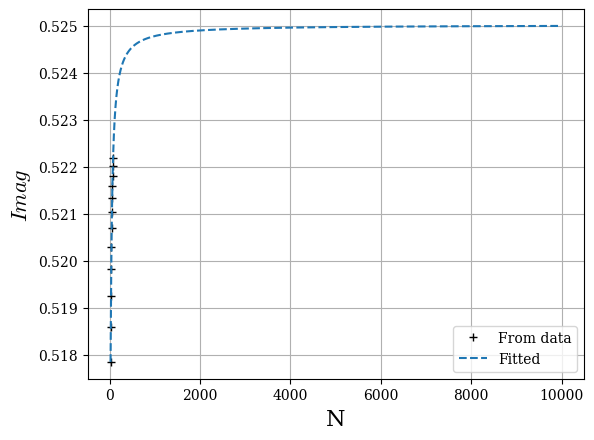

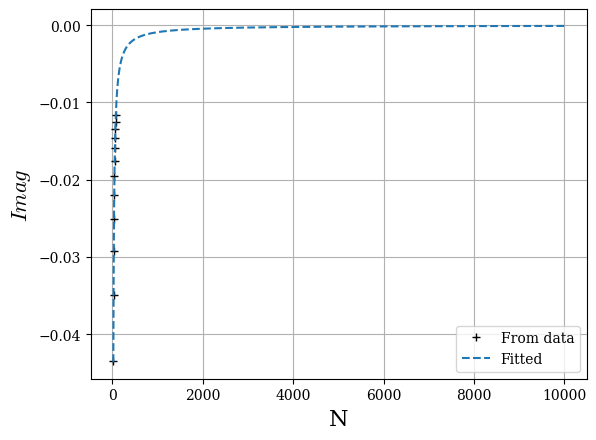

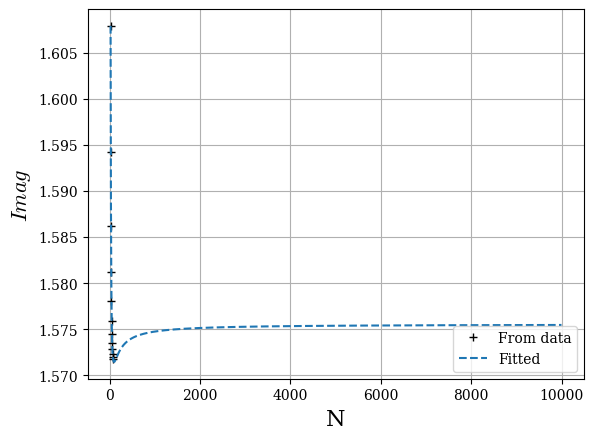

a= -4.647834587171843
b= 0.9282141179856195


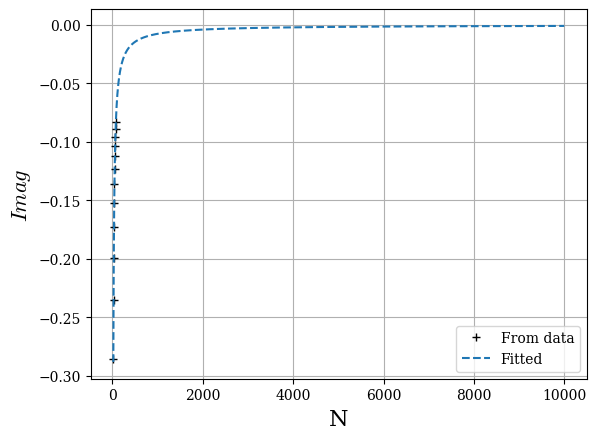

In [25]:

ME1_TC1=[]
for i in range(len(N_TC1)):
    aa=[]
    for j in range(len(data2_TC1[i])):
        if np.imag(data2_TC1[i][j])>1e-3 and np.imag(data2_TC1[i][j])<1.5:
            aa.append(data2_TC1[i][j])
    ME1_TC1.append(aa)


FME1_TC1=[]
for i in range(len(N_TC1)):
    FME1_TC1.append(np.max(ME1_TC1[i]))


from scipy.optimize import curve_fit

param_i, param_cov_i = curve_fit(fun_TC1_Real, N_TC1, np.imag(FME1_TC1), maxfev=10000)
print('a=',param_i[0])
print('b=',param_i[1])
print('c=',param_i[2])
i1Fit_TC1=[]
N1_inv_TC1=[]
[a_i,b_i,c_i,d_i,e_i]=param_i
for i in range(20,10000):
    i1Fit_TC1.append(a_i + b_i/i + c_i/i**2 +d_i/i**3+e_i/i**4)
    N1_inv_TC1.append(i)

plt.plot(N_TC1,np.imag(FME1_TC1),'+k',label='From data')
plt.plot(N1_inv_TC1,i1Fit_TC1,'--',label='Fitted')
plt.legend(loc='lower right')
# plt.title(rf'$Im(\lambda_1)= a({a_i}) +0. b/N + c/N^2$',fontsize='14' )
plt.xlabel('N',fontsize='16')
plt.ylabel('$Imag$',fontsize='16')
#plt.yticks([0,-0.1,-0.2,-0.3,-0.4,-0.5])
plt.grid([2,4,6,8,10,12,14,16,18,20])
plt.show()


param_r, param_cov_r = curve_fit(fun_Imag, N_TC1, np.real(FME1_TC1), maxfev=10000)
r1Fit_TC1=[]
[b_r,c_r]=param_r
for i in range(20,10000):
    r1Fit_TC1.append( b_r/i**c_r)

plt.plot(N_TC1,np.real(FME1_TC1),'+k',label='From data')
plt.plot(N1_inv_TC1,r1Fit_TC1,'--',label='Fitted')
plt.legend(loc='lower right')
# plt.title(rf'$Re(\lambda_1)= a({c_r}) + b/N + c/N^2$',fontsize='14' )
plt.xlabel('N',fontsize='16')
plt.ylabel('$Imag$',fontsize='16')
#plt.yticks([0,-0.1,-0.2,-0.3,-0.4,-0.5])
plt.grid([2,4,6,8,10,12,14,16,18,20])
plt.show()


ME2_TC1=[]
for i in range(len(N_TC1)):
    aa=[]
    for j in range(len(data2_TC1[i])):
        if np.imag(data2_TC1[i][j])>1.5 and np.imag(data2_TC1[i][j])<2:
            aa.append(data2_TC1[i][j])
    ME2_TC1.append(aa)


FME2_TC1=[]
for i in range(len(N_TC1)):
    FME2_TC1.append(np.max(ME2_TC1[i]))



param_i, param_cov_i = curve_fit(fun_TC1_Real, N_TC1, np.imag(FME2_TC1), maxfev=10000)
i2Fit_TC1=[]
N2_inv_TC1=[]
[a_i,b_i,c_i,d_i,e_i]=param_i
for i in range(20,10000):
    i2Fit_TC1.append(a_i + b_i/i + c_i/i**2 +d_i/i**3+e_i/i**4)
    N2_inv_TC1.append(i)

plt.plot(N_TC1,np.imag(FME2_TC1),'+k',label='From data')
plt.plot(N2_inv_TC1,i2Fit_TC1,'--',label='Fitted')
plt.legend(loc='lower right')
# plt.title(rf'$Im(\lambda_1)= a({a_i}) +0. b/N + c/N^2$',fontsize='14' )
plt.xlabel('N',fontsize='16')
plt.ylabel('$Imag$',fontsize='16')
#plt.yticks([0,-0.1,-0.2,-0.3,-0.4,-0.5])
plt.grid([2,4,6,8,10,12,14,16,18,20])
plt.show()


param_r, param_cov_r = curve_fit(fun_Imag, N_TC1, np.real(FME2_TC1), maxfev=10000)
print('a=',param_r[0])
print('b=',param_r[1])
r2Fit_TC1=[]
[b_r,c_r]=param_r
for i in range(20,10000):
    r2Fit_TC1.append( b_r/i**c_r)

plt.plot(N_TC1,np.real(FME2_TC1),'+k',label='From data')
plt.plot(N1_inv_TC1,r2Fit_TC1,'--',label='Fitted')
plt.legend(loc='lower right')
# plt.title(rf'$Re(\lambda_1)= a({c_r}) + b/N + c/N^2$',fontsize='14' )
plt.xlabel('N',fontsize='16')
plt.ylabel('$Imag$',fontsize='16')
#plt.yticks([0,-0.1,-0.2,-0.3,-0.4,-0.5])
plt.grid([2,4,6,8,10,12,14,16,18,20])
plt.show()

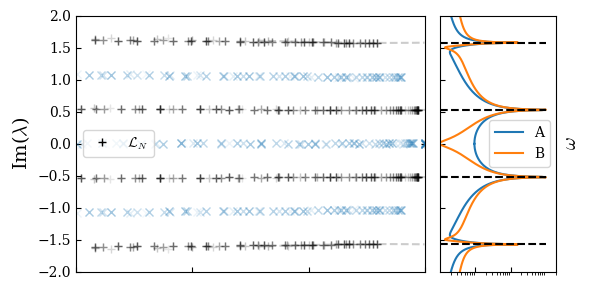

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(6,3), gridspec_kw={'width_ratios': [1,1/3]})
plt.subplots_adjust(hspace=0,wspace=0.01)
ax[0].plot(0,0,'+k',label=r'$\mathcal{L}_N$')
ax[1].semilogx(np.abs(fft_resultA0)/np.max(np.abs(fft_resultA0)),fft_freqA0, '',label='A')
ax[1].semilogx(np.abs(fft_resultB0)/np.max(np.abs(fft_resultB0)),fft_freqB0,'', label='B')

for i in range(len(N_TC1)):
    ax[0].plot(np.real(data_TC1[i]),np.imag(data_TC1[i]),'x',alpha=0.05+i/30,color='tab:blue')
    ax[0].plot(np.real(data2_TC1[i]),np.imag(data2_TC1[i]),'k+',alpha=0.05+i/30)


ax[0].plot(r1Fit_TC1,i1Fit_TC1,'--k',alpha=0.2)
ax[0].plot(r2Fit_TC1,i2Fit_TC1,'--k',alpha=0.2)

ax[0].plot(r1Fit_TC1,-np.array(i1Fit_TC1),'--k',alpha=0.2)
ax[0].plot(r2Fit_TC1,-np.array(i2Fit_TC1),'--k',alpha=0.2)

ax[0].set_xlim(-0.6,0)
ax[0].set_ylim(-2,2)   
ax[0].set_xticks([-0.6,-0.4,-0.2,0],['','','','',])

# ax[0].set_xticks([-1,-0.8,-0.6,-0.4,-0.2,0],['-1','-0.8','-0.6','-0.4','-0.2','0'])

ax[1].plot(np.linspace(0.001,1,50),1.05/2*np.ones(50),'--k')
ax[1].plot(np.linspace(0.001,1,50),-1.05/2*np.ones(50),'--k')
ax[1].plot(np.linspace(0.001,1,50),3*1.05/2*np.ones(50),'--k')
ax[1].plot(np.linspace(0.001,1,50),-3*1.05/2*np.ones(50),'--k')
ax[1].plot(np.linspace(0.001,1,50),5*1.05/2*np.ones(50),'--k')
ax[1].plot(np.linspace(0.001,1,50),-5*1.05/2*np.ones(50),'--k')

# ax[1].plot(np.linspace(0.001,1,50),0.6597479366607667*np.ones(50),'--k')
# ax[0].plot(np.real(TC_n_N_1),np.imag(TC_n_N_1),'+k',label='From data')
# ax[1].set_xlim(-0.5,0)
ax[1].set_yticks([-1.5,-1,-0.5,0,0.5,1,1.5],['','','','','','',''])
ax[1].set_xticks([0.01,0.1])
ax[1].tick_params(direction='in')
ax[0].tick_params(direction='in')#,labelright='true')
ax[1].set_ylim(-2,2)  
ax[1].set_xlim(0.001,2)   
ax[0].legend()
ax[1].legend()
plt.tight_layout()
# ax[0].set_xlabel(r'Re($\lambda$)',fontsize=14)
ax[0].set_ylabel(r'Im($\lambda$)',fontsize=14)
# ax[1].set_xlabel(r'$\mathcal{F}(m_z^{\alpha})$',fontsize=14)
ax[1].set_ylabel(r'$\omega$',fontsize=14)
ax[1].yaxis.set_label_position('right')
ax[1].xaxis.set_ticklabels([])

plt.tight_layout()
# plt.savefig('odd.svg',dpi=300)

# TC 3

a= 1.0587599922211561
b= 1.8049919877407425
c= -17.930212042645486


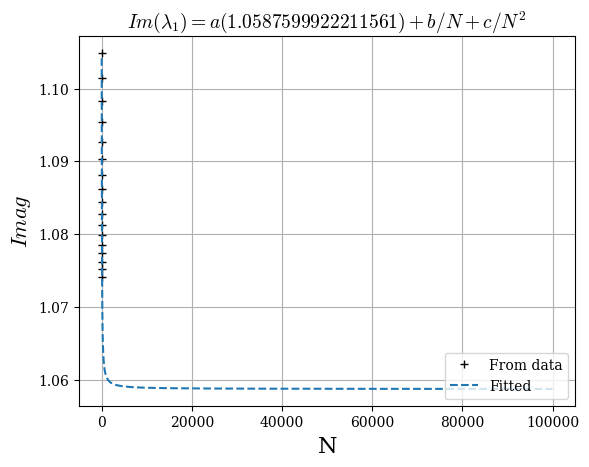

a= -0.3285436073377385
b= 0.4064689669718497


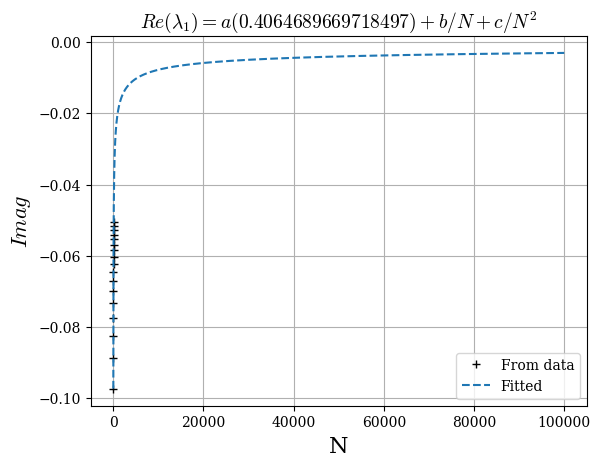

In [27]:

ME1_TC3=[]
for i in range(len(N2_TC3)):
    aa=[]
    for j in range(len(data2_TC3[i])):
        if np.imag(data2_TC3[i][j])>0.8 and np.imag(data2_TC3[i][j])<1.5:
            aa.append(data2_TC3[i][j])
    ME1_TC3.append(aa)


FME1_TC3=[]
for i in range(len(N2_TC3)):
    FME1_TC3.append(np.max(ME1_TC3[i]))


from scipy.optimize import curve_fit


param_i, param_cov_i = curve_fit(fun_TC3_Real, N2_TC3, np.imag(FME1_TC3), maxfev=10000)
print('a=',param_i[0])
print('b=',param_i[1])
print('c=',param_i[2])
i1Fit_TC3=[]
N1_inv_TC3=[]
[a_i,b_i,c_i]=param_i
for i in range(20,100000):
    i1Fit_TC3.append(a_i + b_i/i + c_i/i**2 )
    N1_inv_TC3.append(i)


plt.plot(N2_TC3,np.imag(FME1_TC3),'+k',label='From data')
plt.plot(N1_inv_TC3,i1Fit_TC3,'--',label='Fitted')
plt.legend(loc='lower right')
plt.title(rf'$Im(\lambda_1)= a({a_i}) + b/N + c/N^2$',fontsize='14' )
plt.xlabel('N',fontsize='16')
plt.ylabel('$Imag$',fontsize='16')
#plt.yticks([0,-0.1,-0.2,-0.3,-0.4,-0.5])
plt.grid([2,4,6,8,10,12,14,16,18,20])
plt.show()

param_r, param_cov_r = curve_fit(fun_Imag, N2_TC3, np.real(FME1_TC3), maxfev=10000)
print('a=',param_r[0])
print('b=',param_r[1])
r1Fit_TC3=[]
[b_r,c_r]=param_r
for i in range(20,100000):
    r1Fit_TC3.append( b_r/i**c_r)

plt.plot(N2_TC3,np.real(FME1_TC3),'+k',label='From data')
plt.plot(N1_inv_TC3,r1Fit_TC3,'--',label='Fitted')
plt.legend(loc='lower right')
plt.title(rf'$Re(\lambda_1)= a({c_r}) + b/N + c/N^2$',fontsize='14' )
plt.xlabel('N',fontsize='16')
plt.ylabel('$Imag$',fontsize='16')
#plt.yticks([0,-0.1,-0.2,-0.3,-0.4,-0.5])
plt.grid([2,4,6,8,10,12,14,16,18,20])
plt.show()



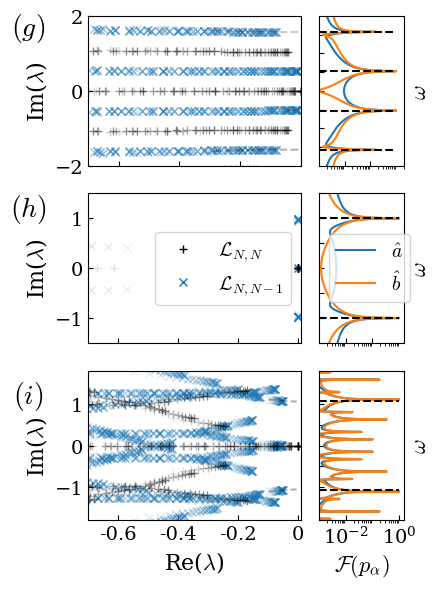

In [28]:
lab_size=14
leg_size=14
cap_size=16
alp=0.3
fig, ax = plt.subplots(3, 2, figsize=(4.5,6), gridspec_kw={'width_ratios': [1,1.2/3]})
plt.subplots_adjust(hspace=0,wspace=0.01)


ax[1,0].plot(0,0,'+k',label=r'$\mathcal{L}_{N,N}$')
ax[1,0].plot(0,0,'x',color='tab:blue',label=r'$\mathcal{L}_{N,N-1}$')

ax[0,1].semilogx(np.abs(fft_resultA0)/np.max(np.abs(fft_resultA0)),fft_freqA0, '',label='A')
ax[0,1].semilogx(np.abs(fft_resultB0)/np.max(np.abs(fft_resultB0)),fft_freqB0,'', label='B')

for i in range(len(N_TC1)):
    ax[0,0].plot(np.real(data_TC1[i]),np.imag(data_TC1[i]),'k+',alpha=0.1+i/30)
for i in range(len(N_TC1)):
    ax[0,0].plot(np.real(data2_TC1[i]),np.imag(data2_TC1[i]),'x',color='tab:blue',alpha=0.1+i/30)

ax[0,0].plot(r1Fit_TC1,i1Fit_TC1,'--k',alpha=0.2)
ax[0,0].plot(r2Fit_TC1,i2Fit_TC1,'--k',alpha=0.2)
ax[0,0].plot(r1Fit_TC1,-np.array(i1Fit_TC1),'--k',alpha=alp)
ax[0,0].plot(r2Fit_TC1,-np.array(i2Fit_TC1),'--k',alpha=alp)
ax[0,0].set_xlim(-0.7,0)
ax[0,0].set_ylim(-2,2)   
ax[0,0].set_xticks([-0.6,-0.4,-0.2,0],['','','','',])

ax[0,1].plot(np.linspace(0.001,1,50),1.05/2*np.ones(50),'--k')
ax[0,1].plot(np.linspace(0.001,1,50),-1.05/2*np.ones(50),'--k')
ax[0,1].plot(np.linspace(0.001,1,50),3*1.05/2*np.ones(50),'--k')
ax[0,1].plot(np.linspace(0.001,1,50),-3*1.05/2*np.ones(50),'--k')
ax[0,1].plot(np.linspace(0.001,1,50),5*1.05/2*np.ones(50),'--k')
ax[0,1].plot(np.linspace(0.001,1,50),-5*1.05/2*np.ones(50),'--k')

# ax[1].plot(np.linspace(0.001,1,50),0.6597479366607667*np.ones(50),'--k')
# ax[0].plot(np.real(TC_n_N_1),np.imag(TC_n_N_1),'+k',label='From data')
# ax[1].set_xlim(-0.5,0)
ax[0,1].set_yticks([-1.5,-1,-0.5,0,0.5,1,1.5],['','','','','','',''])
ax[0,1].set_xticks([0.01,0.1])
ax[0,1].tick_params(direction='in', labelsize=lab_size)
ax[0,0].tick_params(direction='in', labelsize=lab_size)#,labelright='true')
ax[0,1].set_ylim(-2,2)  
ax[0,1].set_xlim(0.001,2)   
ax[1,0].legend(fontsize=leg_size)
plt.tight_layout()
# ax[0].set_xlabel(r'Re($\lambda$)',fontsize=14)
ax[0,0].set_ylabel(r'Im($\lambda$)',fontsize=cap_size)
# ax[1].set_xlabel(r'$\mathcal{F}(m_z^{\alpha})$',fontsize=14)
ax[0,1].set_ylabel(r'$\omega$',fontsize=cap_size)
ax[0,1].yaxis.set_label_position('right')
ax[0,1].xaxis.set_ticklabels([])

#####

ax[1,1].semilogx(np.abs(fft_resultA1)/np.max(np.abs(fft_resultA1)),fft_freqA1, '',label=r'$\hat{a}$')
ax[1,1].semilogx(np.abs(fft_resultB1)/np.max(np.abs(fft_resultB1)),fft_freqB1,'', label=r'$\hat{b}$')
# for i in range(len(N_TC23)):
#     ax[1,0].plot(np.real(data_TC2[i]),np.imag(data_TC2[i]),'k+',alpha=0.1+i/40)
# for i in range(len(N_TC23)):
#     ax[1,0].plot(np.real(FME_TC2[i]),np.imag(FME_TC2[i]),'x',color='tab:blue',alpha=0.1+i/40)
#     ax[1,0].plot(np.real(FME_TC2[i]),-np.imag(FME_TC2[i]),'x',color='tab:blue',alpha=0.1+i/40)
for i in range(len(N2_TC2)):
    ax[1,0].plot(np.real(data1_TC2[i]),np.imag(data1_TC2[i]),'+k',alpha=0.1+i/30)
    ax[1,0].plot(np.real(data2_TC2[i]),-np.imag(data2_TC2[i]),'x',color='tab:blue',alpha=0.1+i/30)

# ax[1,0].plot(np.real(data_TC2[i]),np.imag(data_TC2[i]),'x',color='tab:blue','k+',alpha=0.1+i/40,label=r'$\mathcal{L}_{N,N-1}$')
ax[1,0].set_ylim(-1.5,1.5)   
ax[1,1].legend(fontsize=leg_size)

ax[1,0].set_xticks([-1,-0.8,-0.6,-0.4,-0.2,0],['-1','-0.8','-0.6','-0.4','-0.2','0'])

ax[1,1].plot(np.linspace(0.001,1,50),1*np.ones(50),'--k')
ax[1,1].plot(np.linspace(0.001,1,50),-1*np.ones(50),'--k')
ax[1,1].set_yticks([-1.5,-1,-0.5,0,0.5,1,1.5],['','','','','','',''])
ax[1,1].set_xticks([0.01,0.1])
ax[1,1].tick_params(direction='in', labelsize=lab_size)
ax[1,0].tick_params(direction='in', labelsize=lab_size)#,labelright='true')
ax[1,1].set_ylim(-1.5,1.5)  
ax[1,1].set_xlim(0.001,1.5)  
ax[1,0].set_xlim(-0.7,0.01)  
# ax[1,0].legend(loc='lower left',fontsize=leg_size)
# ax[1,1].legend(fontsize=leg_size)
ax[1,0].set_ylabel(r'Im($\lambda$)',fontsize=cap_size)
ax[1,1].set_ylabel(r'$\omega$',fontsize=cap_size)
ax[1,1].yaxis.set_label_position('right')


ax[2,1].semilogx(np.abs(fft_resultA2)/np.max(np.abs(fft_resultA2)),fft_freqA2,label='A')
ax[2,1].semilogx(np.abs(fft_resultB2)/np.max(np.abs(fft_resultB2)),fft_freqB2, label='B')
for i in range(len(N2_TC3)):
    ax[2,0].plot(np.real(data2_TC3[i]),np.imag(data2_TC3[i]),'x',color='tab:blue',alpha=0.1+i/30)
# ax[2,0].plot(np.real(data1_TC3[i]),np.imag(data1_TC3[i]),'x',color='tab:blue',alpha=0.1+i/25,label=r'$\mathcal{L}_{N}$')
for i in range(len(N1_TC3)):
    ax[2,0].plot(np.real(data1_TC3[i]),np.imag(data1_TC3[i]),'+k',alpha=0.1+i/30)
# ax[2,0].plot(np.real(data2_TC3[i]),np.imag(data2_TC3[i]),'+k',alpha=0.1+i/20,label=r'$\mathcal{L}_{N,N-1}$')
# for i in range(len(N_list)):
#     ax[0].plot(np.real(data_N1N3TC[i]),np.imag(data_N1N3TC[i]),'+c',alpha=0.1+i/25)
# ax[0].plot(np.real(data_N1N3TC[i]),np.imag(data_N1N3TC[i]),'+c',alpha=0.1+i/25,label=r'$N,N-2$')

ax[2,0].plot(r1Fit_TC3,i1Fit_TC3,'--k',alpha=alp)
# ax[2,0].plot(r2Fit_TC3,i2Fit_TC3,'--k',alpha=0.2)
ax[2,0].plot(r1Fit_TC3,-np.array(i1Fit_TC3),'--k',alpha=alp)
# ax[2,0].plot(r2Fit_TC3,-np.array(i2Fit_TC3),'--k',alpha=0.6)

ax[2,0].set_xlim(-0.7,0.01)
ax[2,0].set_ylim(-1.8,1.8)   

ax[2,0].set_xticks([-0.6,-0.4,-0.2,-0],['-0.6','-0.4','-0.2','0'])

ax[2,1].plot(np.linspace(0.001,1,50),1.059*np.ones(50),'--k')
# ax[1,1].plot(np.linspace(0.001,1,50),0.6963002232130472*np.ones(50),'--k')
# ax[2,1].plot(np.linspace(0.001,1,50),0.34546270984932964*np.ones(50),'--k')
# ax[2,1].plot(np.linspace(0.001,1,50),-0.34546270984932964*np.ones(50),'--k')
ax[2,1].plot(np.linspace(0.001,1,50),-1.059*np.ones(50),'--k')
# ax[1,1].plot(np.linspace(0.001,1,50),-0.6963002232130472*np.ones(50),'--k')

# ax[1].plot(np.linspace(0.001,1,50),0.6597479366607667*np.ones(50),'--k')
# ax[0].plot(np.real(TC_n_N_1),np.imag(TC_n_N_1),'+k',label='From data')
# ax[1].set_xlim(-0.5,0)

ax[1,0].xaxis.set_ticklabels([])
ax[1,1].xaxis.set_ticklabels([])
ax[2,1].set_yticks([-1.8,-1,-0.5,0,0.5,1,1.8],['','','','','','',''])
ax[2,1].set_xticks([0.01,1])
ax[2,1].tick_params(direction='in', labelsize=lab_size)
ax[2,0].tick_params(direction='in', labelsize=lab_size)#,labelright='true')
ax[2,1].set_ylim(-1.8,1.8)  
ax[2,1].set_xlim(0.001,1.5)  
# ax[2,0].legend(fontsize=leg_size)
# ax[2,1].legend(loc='lower right',fontsize=leg_size)

# ax[1,1].legend()

ax[2,0].set_xlabel(r'Re($\lambda$)',fontsize=cap_size)
ax[2,0].set_ylabel(r'Im($\lambda$)',fontsize=cap_size)
ax[2,1].set_xlabel(r'$\mathcal{F}(p_{\alpha})$',fontsize=cap_size)
ax[2,1].set_ylabel(r'$\omega$',fontsize=cap_size)
ax[2,1].yaxis.set_label_position('right')
xx=-0.9
ax[0,0].text(
    xx, 1.7,  # Position (x, y) in figure coordinates
    r'$(g)$',  # Text to display
    ha='center',  # Horizontal alignment
    va='center',  # Vertical alignment
    fontsize=20  # Font size
#     color='white'
)
ax[1,0].text(
    xx, 1.2,  # Position (x, y) in figure coordinates
    r'$(h)$',  # Text to display
    ha='center',  # Horizontal alignment
    va='center',  # Vertical alignment
    fontsize=20  # Font size
#     color='white'
)
ax[2,0].text(
    xx, 1.2,  # Position (x, y) in figure coordinates
    r'$(i)$',  # Text to display
    ha='center',  # Horizontal alignment
    va='center',  # Vertical alignment
    fontsize=20  # Font size
#     color='white'
)

plt.tight_layout()
# plt.savefig('eigs_fft.svg',dpi=300)
plt.show()